# Part 1 - Temporal variability and selecting flood plumes

**Notebook outline:**

This notebook details early exploratory data analysis to understand the temporal variablity of hydrodynamic and biogeochemical variables extending from the Burdekin River. These variables will be assessed over the whole time period of available data (~2010 - 2019) and a sample flood event will be selected for further analysis. For the selected flood event, a more detailed analysis of temporal variability in the biogeochemical and hydrodynamic variables will be assessed before, during, and after the flood event. 

# Setup

Load in packages required for analysis:

In [1]:
# import pandas 
import pandas as pd

# import matplotlib 
from matplotlib import pyplot as plt

# setup plot parameters and view in-notebook
plt.rcParams['figure.figsize'] = (16,8)
%matplotlib inline

# Load and setup data 

Load in master data file and setup structure to facilitate analysis. 

## Load in master data file 

In [2]:
# Load in df 
df = pd.read_csv(
        "masterdf.csv",
        sep=r",",
        engine="c",
        header=0,
        na_filter=False,
        low_memory=False,
    )

Check that the dataframe has been loaded in correctly: 

In [3]:
df.head()

,Aggregated Date/Time,Depth,Site Name,Latitude,Longitude,Distance from rivermouth,omega,pH,salt,chloro
0,2010-12-01,-0.5,Old Reef,-19.4035,148.11089,61.465,3.000000,8.000000,35.326149,1.000000e-12
1,2010-12-02,-0.5,Old Reef,-19.4035,148.11089,61.465,3.584837,8.045557,35.341277,1.000000e-12
2,2010-12-03,-0.5,Old Reef,-19.4035,148.11089,61.465,3.617490,8.043440,35.339268,1.000000e-12
3,2010-12-04,-0.5,Old Reef,-19.4035,148.11089,61.465,3.628837,8.039520,35.334864,1.000000e-12
4,2010-12-05,-0.5,Old Reef,-19.4035,148.11089,61.465,3.630052,8.038121,35.334683,1.000000e-12


Remove coral symbiont chlorophyll data as it is not available for all sites and cannot be assessed spatially: 

In [4]:
df = df.drop(columns = ['chloro'])

Adjust "Aggregate Date/Time" column to date/time format

In [5]:
df['Aggregated Date/Time']= pd.to_datetime(df['Aggregated Date/Time'])

Remove spaces and symbols in column names (for formatting and analysis purposes)

In [6]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('/','_')

# Exploratory data analysis 

Exploratory data analysis will be conducted to assess how the ocean hydrodynamic and biogeochemical variables change over time, and how this variability changes between sampling sites. Long-term plots of each variable will be used to identify potential flood events to investigate in more detail. 

## Long-term variable plots 

Plot the long-term trends of each ocean hydrodynamic and biogeochemical variable for the available time series of the data (1st December 2010 - 30th April 2019). Peaks and/or troughs in the data may highlight potential flooding events. Stacking the plots vertically will enable a direct comparison of potential relationships over time and indicate potential relationships or interactions. 

To plot, extract and create a separate dataframe for each site: 

In [7]:
rivermouth = df[(df.Site_Name == "Burdekin river rivermouth")]
offshore = df[(df.Site_Name == "Burdekin river offshore")]
tink = df[(df.Site_Name == "Tink shoal")]
wilson = df[(df.Site_Name == "Wilson Shoal")]
morinda = df[(df.Site_Name == "Morinda Shoal")]
old = df[(df.Site_Name == "Old Reef")]
stanley = df[(df.Site_Name == "Stanley Reef")]
bowden = df[(df.Site_Name == "Bowden Reef")]
darley = df[(df.Site_Name == "Darley Reef")]
broadhurst = df[(df.Site_Name == "(Big) Broadhurst Reef (No. 1)")]
charity = df[(df.Site_Name == "Charity reef")]
shell = df[(df.Site_Name == "Shell Reef")]
faith = df[(df.Site_Name == "Faith Reef")]
shrimp = df[(df.Site_Name == "Shrimp Reef")]
hope = df[(df.Site_Name == "Hope Reef")]
UN_19_280 = df[(df.Site_Name == "U/N Reef 19-280")]
viper = df[(df.Site_Name == "Viper Reef")]
UN_18_132 = df[(df.Site_Name == "U/N Reef 18-132")]
tiger = df[(df.Site_Name == "Tiger Reef")]
cup = df[(df.Site_Name == "Cup Reef (North)")]
leopard = df[(df.Site_Name == "Leopard reef")]
jacqueline = df[(df.Site_Name == "Jacqueline Reef")]

Setup plot structure and plot hydrodynamic and biogeochemical variables as sub-plots: 

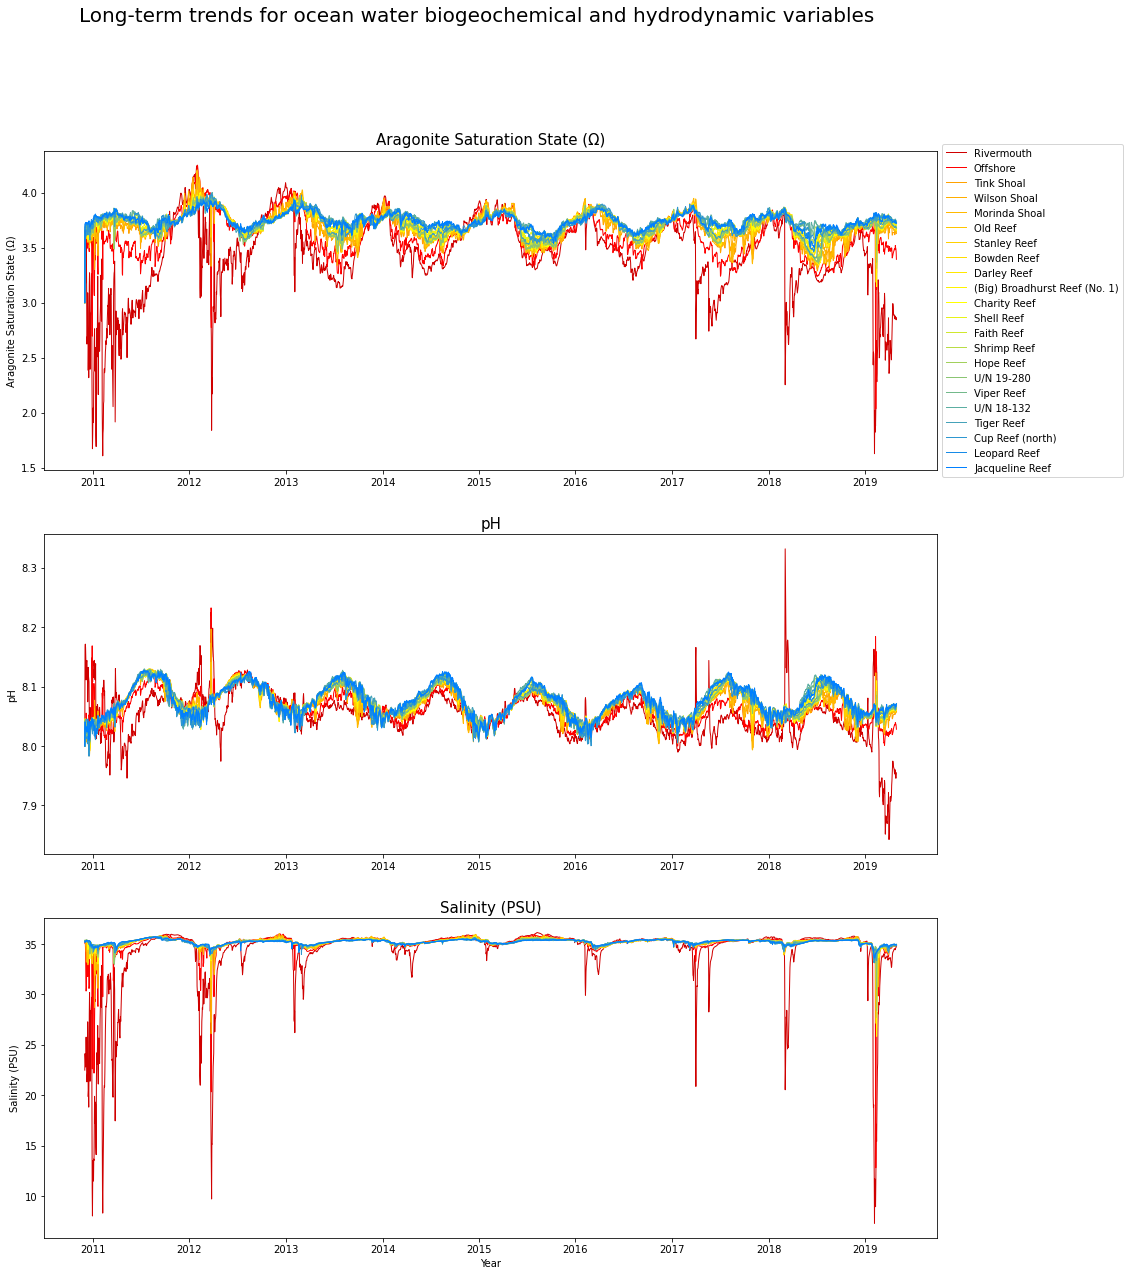

In [8]:
# Define figure structure: 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (16, 20))

# fig, axs = ax2.subplots(4)
fig.suptitle('Long-term trends for ocean water biogeochemical and hydrodynamic variables', size = 20)

# Plot each site: 

## Plot 1: 
ax1.plot('Aggregated_Date_Time', 'omega', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax1.plot('Aggregated_Date_Time', 'omega', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax1.plot('Aggregated_Date_Time', 'omega', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax1.plot('Aggregated_Date_Time', 'omega', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax1.plot('Aggregated_Date_Time', 'omega', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax1.plot('Aggregated_Date_Time', 'omega', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax1.plot('Aggregated_Date_Time', 'omega', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

## Plot 2
ax2.plot('Aggregated_Date_Time', 'pH', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax2.plot('Aggregated_Date_Time', 'pH', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax2.plot('Aggregated_Date_Time', 'pH', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax2.plot('Aggregated_Date_Time', 'pH', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax2.plot('Aggregated_Date_Time', 'pH', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax2.plot('Aggregated_Date_Time', 'pH', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax2.plot('Aggregated_Date_Time', 'pH', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

## Plot 3
ax3.plot('Aggregated_Date_Time', 'salt', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax3.plot('Aggregated_Date_Time', 'salt', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax3.plot('Aggregated_Date_Time', 'salt', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax3.plot('Aggregated_Date_Time', 'salt', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax3.plot('Aggregated_Date_Time', 'salt', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax3.plot('Aggregated_Date_Time', 'salt', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax3.plot('Aggregated_Date_Time', 'salt', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

# Assign subtitles to each sub-plot 
ax1.set_title('Aragonite Saturation State (Ω)', size = 15)
ax2.set_title('pH', size = 15)
ax3.set_title('Salinity (PSU)', size = 15)

# Assign axis labels where appropriate: 

ax1.set(ylabel = 'Aragonite Saturation State (Ω)')
ax2.set(ylabel = 'pH')
ax3.set(ylabel = 'Salinity (PSU)', 
       xlabel = 'Year')

# Add a legend to right 
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Export plot: 
plt.savefig('long-term_trends.png')

**Plot analysis:**

Overall, all hydrodynamic and biogeochemical variables exhibited some degree of spatial and temporal variability between 2010 and 2019. There was a clear seasonal, inverse relationship between pH and Ω (Figure 1). In summer/autumn, Ω values were high while pH was low, whereas in winter-spring, Ω values were low while pH was more alkaline (Figure 1). Likewise, salinity variations were highly seasonal, however, the extent of drops in salinity varied year-to-year (Figure 1). Overall, sites located closer to the Burdekin River mouth experienced greater variability in all hydrodynamic and biogeochemical variables compared to sites further away (Figure 1). From Figure 1, five major flood events were identified. These occurred in early 2011, early-to-mid 2012, mid-2017, early-to-mid 2018, and early 2019 (Figure 1). For each major flood event, the inverse relationship between pH and Ω is prominent, and there was a positive relationship between salinity and Ω (Figure 1). 

## Assess flood events in detail

Five key flood events have been identified from the long-term HYDRO and BGC variable plots (above). To explore how each variable changes spatially and temporally, as well as assess how these interact with other HYDRO and BGC variables in more detail, the time period around specific flood events can be plotted. 

The 2019 flood event was chosen as a case study to assess this variability. The 2029 flood event caused a large peak in pH values and a trough in aragonite saturation state and salinity values. 

### 2019 Flood Event

Filter out data for 2019 flood event between 1st January 2019 and 1st April 2019. This is an arbitarily defined window to capture a range of values before, during, and after the flood event: 

In [9]:
# Extrac values that lie within date range selected (1/1/2019 - 01/04/2019)
mask = (df.Aggregated_Date_Time >= '2019-01-01') & (df.Aggregated_Date_Time <= '2019-04-01')
# create new object with these dates 
df_2019 = df.loc[mask]

For the 2019 flood event data, extract each site as a separate dataframe: 

In [10]:
# Assign each Site_Name to a new dataframe to plot: 
rivermouth = df_2019[(df_2019.Site_Name == "Burdekin river rivermouth")]
offshore = df_2019[(df_2019.Site_Name == "Burdekin river offshore")]
tink = df_2019[(df_2019.Site_Name == "Tink shoal")]
wilson = df_2019[(df_2019.Site_Name == "Wilson Shoal")]
morinda = df_2019[(df_2019.Site_Name == "Morinda Shoal")]
old = df_2019[(df_2019.Site_Name == "Old Reef")]
stanley = df_2019[(df_2019.Site_Name == "Stanley Reef")]
bowden = df_2019[(df_2019.Site_Name == "Bowden Reef")]
darley = df_2019[(df_2019.Site_Name == "Darley Reef")]
broadhurst = df_2019[(df_2019.Site_Name == "(Big) Broadhurst Reef (No. 1)")]
charity = df_2019[(df_2019.Site_Name == "Charity reef")]
shell = df_2019[(df_2019.Site_Name == "Shell Reef")]
faith = df_2019[(df_2019.Site_Name == "Faith Reef")]
shrimp = df_2019[(df_2019.Site_Name == "Shrimp Reef")]
hope = df_2019[(df_2019.Site_Name == "Hope Reef")]
UN_19_280 = df_2019[(df_2019.Site_Name == "U/N Reef 19-280")]
viper = df_2019[(df_2019.Site_Name == "Viper Reef")]
UN_18_132 = df_2019[(df_2019.Site_Name == "U/N Reef 18-132")]
tiger = df_2019[(df_2019.Site_Name == "Tiger Reef")]
cup = df_2019[(df_2019.Site_Name == "Cup Reef (North)")]
leopard = df_2019[(df_2019.Site_Name == "Leopard reef")]
jacqueline = df_2019[(df_2019.Site_Name == "Jacqueline Reef")]

Plot HYDRO and BGC variables as subplots for the 2019 flood event. 

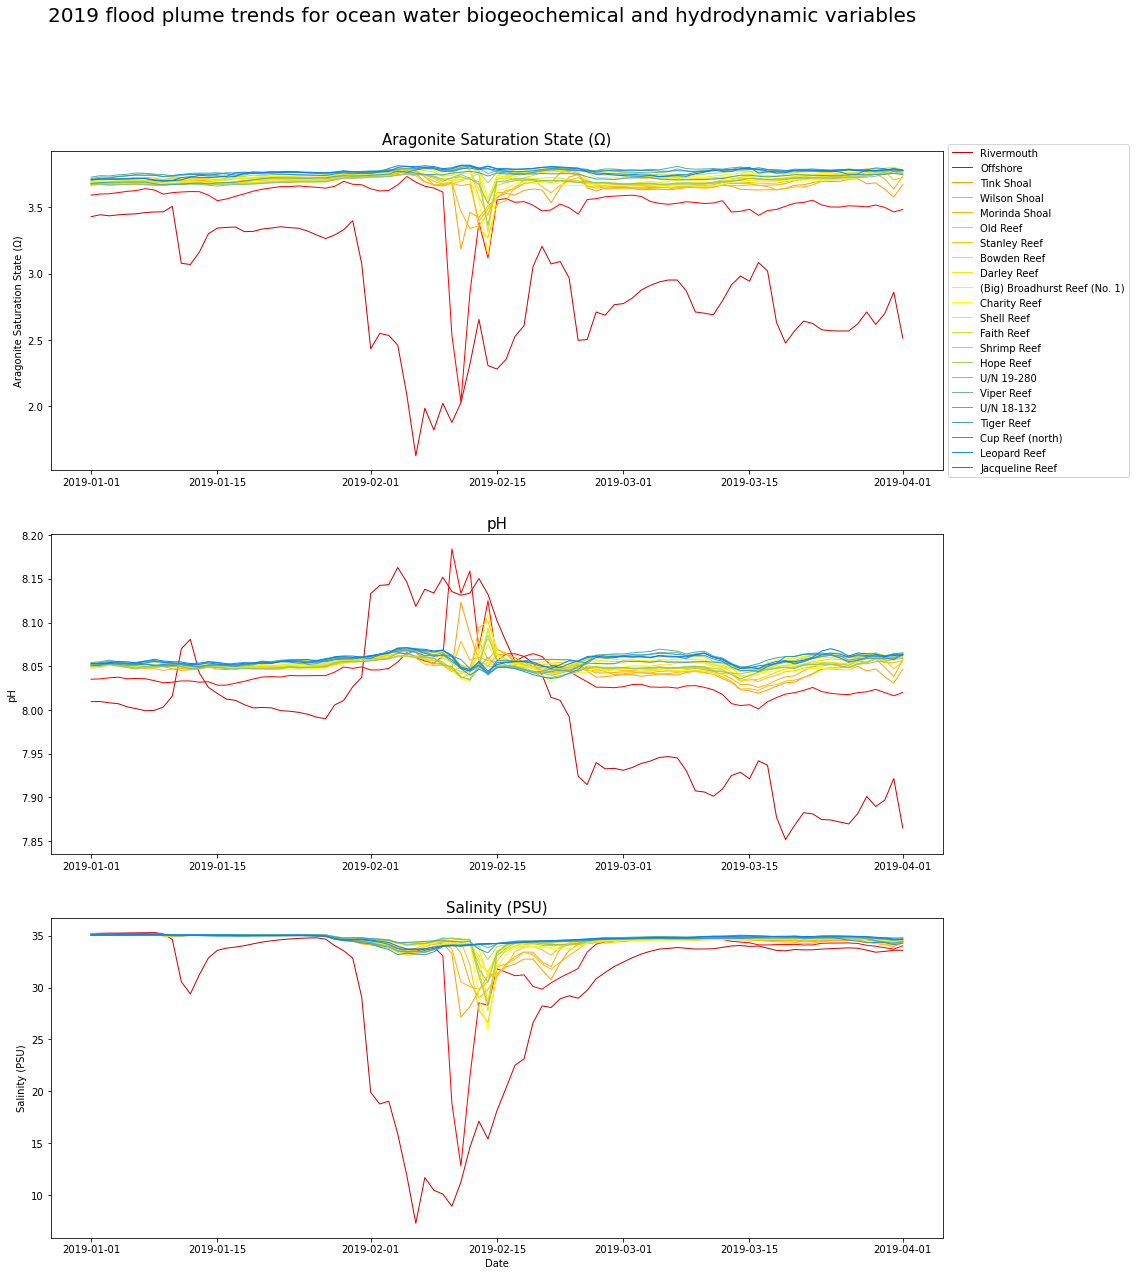

In [12]:
# Define figure structure: 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (16, 20))

# fig, axs = ax2.subplots(4)
fig.suptitle('2019 flood plume trends for ocean water biogeochemical and hydrodynamic variables', size = 20)

# Plot each site: 

## Plot 1: 
ax1.plot('Aggregated_Date_Time', 'omega', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax1.plot('Aggregated_Date_Time', 'omega', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax1.plot('Aggregated_Date_Time', 'omega', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax1.plot('Aggregated_Date_Time', 'omega', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax1.plot('Aggregated_Date_Time', 'omega', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax1.plot('Aggregated_Date_Time', 'omega', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax1.plot('Aggregated_Date_Time', 'omega', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax1.plot('Aggregated_Date_Time', 'omega', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax1.plot('Aggregated_Date_Time', 'omega', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

## Plot 2
ax2.plot('Aggregated_Date_Time', 'pH', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax2.plot('Aggregated_Date_Time', 'pH', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax2.plot('Aggregated_Date_Time', 'pH', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax2.plot('Aggregated_Date_Time', 'pH', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax2.plot('Aggregated_Date_Time', 'pH', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax2.plot('Aggregated_Date_Time', 'pH', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax2.plot('Aggregated_Date_Time', 'pH', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax2.plot('Aggregated_Date_Time', 'pH', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax2.plot('Aggregated_Date_Time', 'pH', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

## Plot 3
ax3.plot('Aggregated_Date_Time', 'salt', data = rivermouth, color = '#d00000', linewidth = 1, label = 'Rivermouth')
ax3.plot('Aggregated_Date_Time', 'salt', data = offshore, color = '#FF0000', linewidth = 1, label = 'Offshore')
ax3.plot('Aggregated_Date_Time', 'salt', data = tink, color = '#FFA200', linewidth = 1, label = 'Tink Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = wilson, color = '#FFAE00', linewidth = 1, label = 'Wilson Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = morinda, color = '#FFB900', linewidth = 1, label = 'Morinda Shoal')
ax3.plot('Aggregated_Date_Time', 'salt', data = old, color = '#FFC500', linewidth = 1, label = 'Old Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = stanley, color = '#FFD000', linewidth = 1, label = 'Stanley Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = bowden, color = '#FFDC00', linewidth = 1, label = 'Bowden Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = darley, color = '#FFE700', linewidth = 1, label = 'Darley Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = broadhurst, color = '#FFF300', linewidth = 1, label = '(Big) Broadhurst Reef (No. 1)')
ax3.plot('Aggregated_Date_Time', 'salt', data = charity, color = '#FFFF00', linewidth = 1, label = 'Charity Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = shell, color = '#E7F317', linewidth = 1, label = 'Shell Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = faith, color = '#D0E72E', linewidth = 1, label = 'Faith Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = shrimp, color = '#B9DC45', linewidth = 1, label = 'Shrimp Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = hope, color = '#A2D05C', linewidth = 1, label = 'Hope Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = UN_19_280, color = '#8BC573', linewidth = 1, label = 'U/N 19-280')
ax3.plot('Aggregated_Date_Time', 'salt', data = viper, color = '#73B98B', linewidth = 1, label = 'Viper Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = UN_18_132, color = '#5CAEA2', linewidth = 1, label = 'U/N 18-132')
ax3.plot('Aggregated_Date_Time', 'salt', data = tiger, color = '#45A2B9', linewidth = 1, label = 'Tiger Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = cup, color = '#2E97D0', linewidth = 1, label = 'Cup Reef (north)')
ax3.plot('Aggregated_Date_Time', 'salt', data = leopard, color = '#178BE7', linewidth = 1, label = 'Leopard Reef')
ax3.plot('Aggregated_Date_Time', 'salt', data = jacqueline, color = '#0080FF', linewidth = 1, label = 'Jacqueline Reef')

# Assign subtitles to each sub-plot 
ax1.set_title('Aragonite Saturation State (Ω)', size = 15)
ax2.set_title('pH', size = 15)
ax3.set_title('Salinity (PSU)', size = 15)

# Assign axis labels where appropriate: 

ax1.set(ylabel = 'Aragonite Saturation State (Ω)')
ax2.set(ylabel = 'pH')
ax3.set(ylabel = 'Salinity (PSU)',
       xlabel = 'Date')

# Add a legend to right 
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Export plot 
plt.savefig('2019-flood_trends.png')

**Plot analysis:**

The 2019 flood event was selected as a case study event, and the temporal variability of the hydrodynamic and biochemical variables was analysed between 1st January 2019 and 1st April 2019. A flood discharge event from the Burdekin River occurred around ~28th January 2019, resulting in an increase in seawater alkalinity and a decline in Ω and salinity labels (Figure 2). The peak flood discharge occurred around ~5th February 2019 (Figure 2). Seawater pH and Ω values showed the same inverse relationship as the long-term temporal pattern, and salinity and Ω followed similar trends (Figure 2). There was a delay in fluctuations of Ω, pH, and salinity values after the flood event between sites located near the Burdekin River mouth and outer reef sites (Figure 2). 

# Future analysis 

Based on the findings here, additional anaylses will be undertaken to assess the degree of correlation between the different HYDRO and BGC variables (see Part 2). The spatial distribution, extent, and movement of the flood plume, based on these HYDRO and BGC variables, will also be assessed (see Part 3). 